<a href="https://colab.research.google.com/github/theroyalraj/Deep-Learning/blob/master/Digit%20Recognition(using%20MNIST%20example%20Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit rcognition (MNIST Dataset)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Defining Model

In [4]:
input_size = 784
output_size = 10
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# Reset any variables left in memory from previous runs.
tf.reset_default_graph()

# As in the previous example - declare placeholders where the data will be fed into.
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# Weights and biases for the first linear combination between the inputs and the first hidden layer.
# Use get_variable in order to make use of the default TensorFlow initializer which is Xavier.
weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])

# Operation between the inputs and the first hidden layer.
# We've chosen ReLu as our activation function. You can try playing with different non-linearities.
outputs_1 = tf.nn.relu(tf.matmul(inputs, weights_1) + biases_1)

# Weights and biases for the second linear combination.
# This is between the first and second hidden layers.
weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2", [hidden_layer_size])

# Operation between the first and the second hidden layers. Again, we use ReLu.
outputs_2 = tf.nn.relu(tf.matmul(outputs_1, weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3", [hidden_layer_size, hidden_layer_size])
biases_3 = tf.get_variable("biases_3", [hidden_layer_size])

# Operation between the second and the third hidden layers. Again, we use ReLu.
outputs_3 = tf.nn.relu(tf.matmul(outputs_2, weights_3) + biases_3)

# Weights and biases for the final linear combination.
# That's between the second hidden layer and the output layer.
weights_4 = tf.get_variable("weights_4", [hidden_layer_size, output_size])
biases_4 = tf.get_variable("biases_4", [output_size])

outputs=tf.matmul(outputs_3,weights_4)+biases_4

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#creating Loss Function
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=outputs, labels=targets)
# Get the Mean loss
mean_loss = tf.reduce_mean(loss)

In [6]:
# Define the optimization step. Using adaptive optimizers such as Adam in TensorFlow
# Tensorflow has in-built function for otimizer we will use AdamOptimzer
optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

### Defining Accuracy function

In [7]:
# Get a 0 or 1 for every input in the batch indicating whether it output the correct answer out of the 10.
out_equals_target = tf.equal(tf.argmax(outputs, axis=1), tf.argmax(targets, axis=1))

# Get the average accuracy of the outputs.
accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

In [8]:
# Declare the session variable.
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()

In [9]:
# Now running the initializer sesssion
# It will initialize all the variables using Xavier Initiolize method. 
sess.run(initializer)

In [10]:
# Defining Batch Size 
batch_size = 50

# Number of batches per epoch.
batches_number = mnist.train._num_examples // batch_size

# Training

In [11]:
# Setting A Max limit.
max_epochs = 25

#for early stopping we need to check weather the validation loss start increasing.
prev_validation_loss = float('inf')


#loop for epoch
for e in range(max_epochs):
    
    # Keep track of the sum of batch losses in the epoch.
    curr_epoch_loss = 0.
    
    # Iterate over the batches in this epoch.
    for batch_counter in range(batches_number):
        
        # Input batch and target batch are assigned values from the train dataset, given a batch size
        input_batch, target_batch = mnist.train.next_batch(batch_size)
        
        # Run the optimization step and get the mean loss for this batch.
        _, batch_loss = sess.run([optimize, mean_loss], 
            feed_dict={inputs: input_batch, targets: target_batch})
        
        curr_epoch_loss += batch_loss
    
    #average batch loss
    curr_epoch_loss /= batches_number
    
    # At the end of each epoch, get the validation loss and accuracy
    # Get the input batch and the target batch from the validation dataset
    input_batch, target_batch = mnist.validation.next_batch(mnist.validation._num_examples)
    
    # Run without the optimization step (simply forward propagate)
    validation_loss, validation_accuracy = sess.run([mean_loss, accuracy], 
        feed_dict={inputs: input_batch, targets: target_batch})
    
    #Print the current Epoch situation
    print('Epoch '+str(e+1)+
          '. Mean loss: '+'{0:.4f}'.format(curr_epoch_loss)+
          '. Validation loss: '+'{0:.4f}'.format(validation_loss)+
          '. Validation accuracy: '+'{0:.3f}'.format(validation_accuracy * 100.)+'%')
    
    # For stopping if validation loss starts increasing to avoid the overfitting
    if validation_loss > prev_validation_loss:
        break
        
    # updateing prev validation loss.
    prev_validation_loss = validation_loss
print('End of training.')

Epoch 1. Mean loss: 0.3419. Validation loss: 0.1593. Validation accuracy: 95.500%
Epoch 2. Mean loss: 0.1514. Validation loss: 0.1247. Validation accuracy: 96.160%
Epoch 3. Mean loss: 0.1122. Validation loss: 0.1146. Validation accuracy: 96.440%
Epoch 4. Mean loss: 0.0908. Validation loss: 0.1119. Validation accuracy: 96.680%
Epoch 5. Mean loss: 0.0768. Validation loss: 0.1116. Validation accuracy: 96.980%
Epoch 6. Mean loss: 0.0655. Validation loss: 0.0976. Validation accuracy: 97.180%
Epoch 7. Mean loss: 0.0563. Validation loss: 0.0915. Validation accuracy: 97.520%
Epoch 8. Mean loss: 0.0506. Validation loss: 0.0859. Validation accuracy: 97.900%
Epoch 9. Mean loss: 0.0438. Validation loss: 0.0883. Validation accuracy: 97.640%
End of training.


# Testing The Model

In [12]:
input_batch, target_batch = mnist.test.next_batch(mnist.test._num_examples) 
test_accuracy = sess.run([accuracy], 
                          feed_dict={inputs: input_batch, targets: target_batch})   

In [13]:
print("Test Accuracy = "+str(test_accuracy[0]*100)+" %")

Test Accuracy = 97.21999764442444%


# Visualizating the Result

In [14]:
print(input_batch[5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## We cannot predict the digit from the above
### we need to plot a image from the data above

In [15]:
import matplotlib.pyplot as plt

In [16]:
input_batch_vis, target_batch_vis = mnist.train.next_batch(50)

In [17]:
plt.figure(figsize=(7,7))
gimg=input_batch_vis[1].reshape(28,28)

<Figure size 504x504 with 0 Axes>

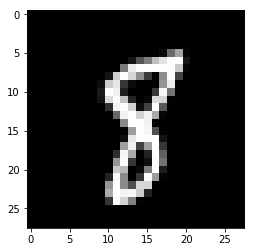

In [18]:
plt.imshow(gimg,cmap="gray")
plt.show()

### so we can conclude that above number is same

In [19]:
target_batch_vis[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

### So we can verify position at target_batch is same as the digit (as target batch is one hot encoded)

# now lets check if our model predict the same

In [21]:
target_batch_vis[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [25]:
prints=tf.Print(target_batch_vis[1],[target_batch_vis[1]],"hello")

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



In [26]:
sess.run([prints])

[array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])]

In [27]:
test = sess.run([prints], 
                          feed_dict={inputs: input_batch_vis, targets: target_batch_vis}) 

In [28]:
test

[array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])]

## so the output is same is the target